#Customer_Segmentation

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
df = pd.read_csv("Customer_Segmentation_py.csv")

#Data Understanding and Exploration:

##Primary Understanding

In [4]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26/11/2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,26/11/2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,23/03/2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,23/03/2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,15/05/2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [5]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


##1. What is the distribution of customers across different age groups (Age_Group)?

In [6]:
Age_Distribuations=df["Age_Group"].value_counts()
Age_Distribuations

,count
Age_Group,
Adults (35-64),55824
Young Adults (25-34),38654
Youth (<25),17828
Seniors (64+),730


In [7]:
list(Age_Distribuations.index)

['Adults (35-64)', 'Young Adults (25-34)', 'Youth (<25)', 'Seniors (64+)']

I have run previous cell to copy and paste the colume name to the next cell.

In [8]:
Age_Distribuations=Age_Distribuations[['Youth (<25)','Young Adults (25-34)','Adults (35-64)','Seniors (64+)']]
Age_Distribuations.reset_index()

,Age_Group,count
0,Youth (<25),17828
1,Young Adults (25-34),38654
2,Adults (35-64),55824
3,Seniors (64+),730


In [9]:
Age_Dis_df_answer=Age_Distribuations.reset_index()
Age_Dis_df=Age_Dis_df_answer
Age_Dis_df

,Age_Group,count
0,Youth (<25),17828
1,Young Adults (25-34),38654
2,Adults (35-64),55824
3,Seniors (64+),730


In [10]:
Age_Dis_df_answer.loc[len(Age_Dis_df)] = ["TOTAL=", Age_Dis_df["count"].sum()]
Age_Dis_df_answer

,Age_Group,count
0,Youth (<25),17828
1,Young Adults (25-34),38654
2,Adults (35-64),55824
3,Seniors (64+),730
4,TOTAL=,113036


##2. How does Customer_Gender vary across different countries or states?

In [11]:
countries=pd.Series(df["Country"].unique())

In [12]:
pd.Series(df["State"].unique())

,0
0,British Columbia
1,New South Wales
2,Victoria
3,Oregon
4,California
5,Saarland
6,Seine Saint Denis
7,Moselle
8,Queensland
9,England


In [13]:
pd.Series(df["Customer_Gender"].unique())

,0
0,M
1,F


In [14]:
Count_Stat_Gend=df[['Country',"State","Customer_Gender"]]
Count_Stat_Gend

,Country,State,Customer_Gender
0,Canada,British Columbia,M
1,Canada,British Columbia,M
2,Australia,New South Wales,M
3,Australia,New South Wales,M
4,Australia,New South Wales,F
...,...,...,...
113031,United Kingdom,England,M
113032,Australia,Queensland,M
113033,Australia,Queensland,M
113034,France,Seine (Paris),F


###Raw Code (Optional: Need not to run these cells)

In [15]:
M_F_Country = pd.DataFrame(columns=["Country","Num of Male","Num of Female"])
M_F_Country

,Country,Num of Male,Num of Female


In [16]:
for country in countries:
  M_F_Country.loc[len(M_F_Country)] = [country, 0, 0]

  for index,(country_in_df,state,gender) in Count_Stat_Gend.iterrows():
    if country==country_in_df:
      if gender=="M":
        M_F_Country.at[len(M_F_Country)-1, "Num of Male"] += 1
      elif gender=="F":
         M_F_Country.at[len(M_F_Country)-1, "Num of Female"] += 1
      else:
        print("There might be a problem on your data or logics.")

In [17]:
M_F_Country


,Country,Num of Male,Num of Female
0,Canada,7682,6496
1,Australia,12430,11506
2,United States,20272,18934
3,Germany,5526,5572
4,France,5494,5504
5,United Kingdom,6908,6712


In [18]:
M_F_Country["Num of Male"].sum()+M_F_Country["Num of Female"].sum()

113036

###Efficient code

In [19]:
gender_distributions = Count_Stat_Gend.groupby(["Country","State" ,"Customer_Gender"]).size()
gender_distributions.name = "frequency"
gen_dis_df=pd.DataFrame(gender_distributions)
gen_dis_df


frequency
Country       State           Customer_Gender           
Australia     New South Wales F                     5230
                              M                     5182
              Queensland      F                     2568
                              M                     2652
              South Australia F                      772
...                                                  ...
United States Virginia        M                        4
              Washington      F                     5440
                              M                     5824
              Wyoming         F                        2
                              M                        6

[93 rows x 1 columns]

<ipython-input-20-75173b938d56>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


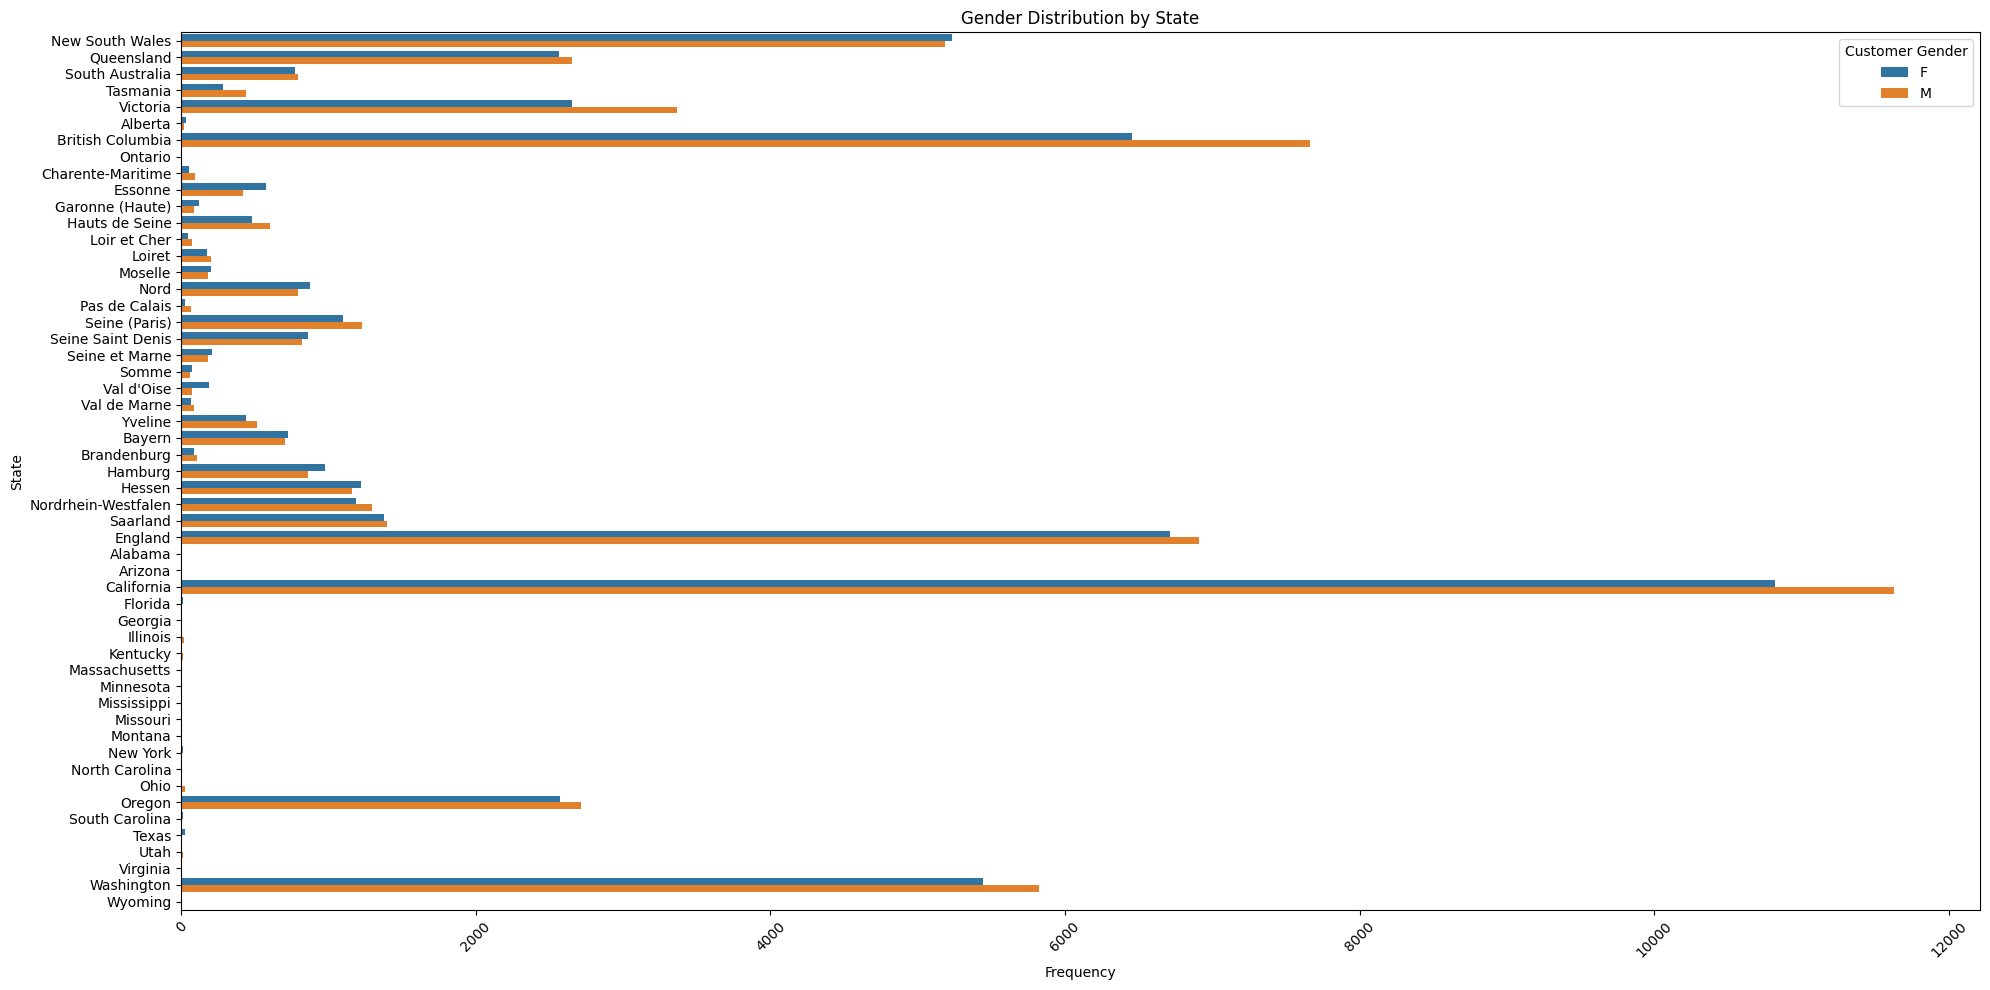

In [20]:
pivot_df=gen_dis_df.pivot_table(
    index=["Country", "State"],
    columns="Customer_Gender",
    values="frequency",
    aggfunc="sum",
    fill_value=0)


pivot_df = pivot_df.reset_index()

# Plotting
plt.figure(figsize=(20,10))
sns.barplot(
    data=pivot_df.melt(id_vars=["Country", "State"], value_vars=["F", "M"]),
    y="State", x="value", hue="Customer_Gender",
    ci=None, dodge=True, palette=["#1f77b4", "#ff7f0e"]
)

plt.xticks(rotation=45)
plt.xlabel("Frequency")
plt.ylabel("State")
plt.title("Gender Distribution by State")
plt.legend(title="Customer Gender")

# Show the plot
plt.tight_layout()
plt.show()

<ipython-input-21-f6e2fb5b723d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


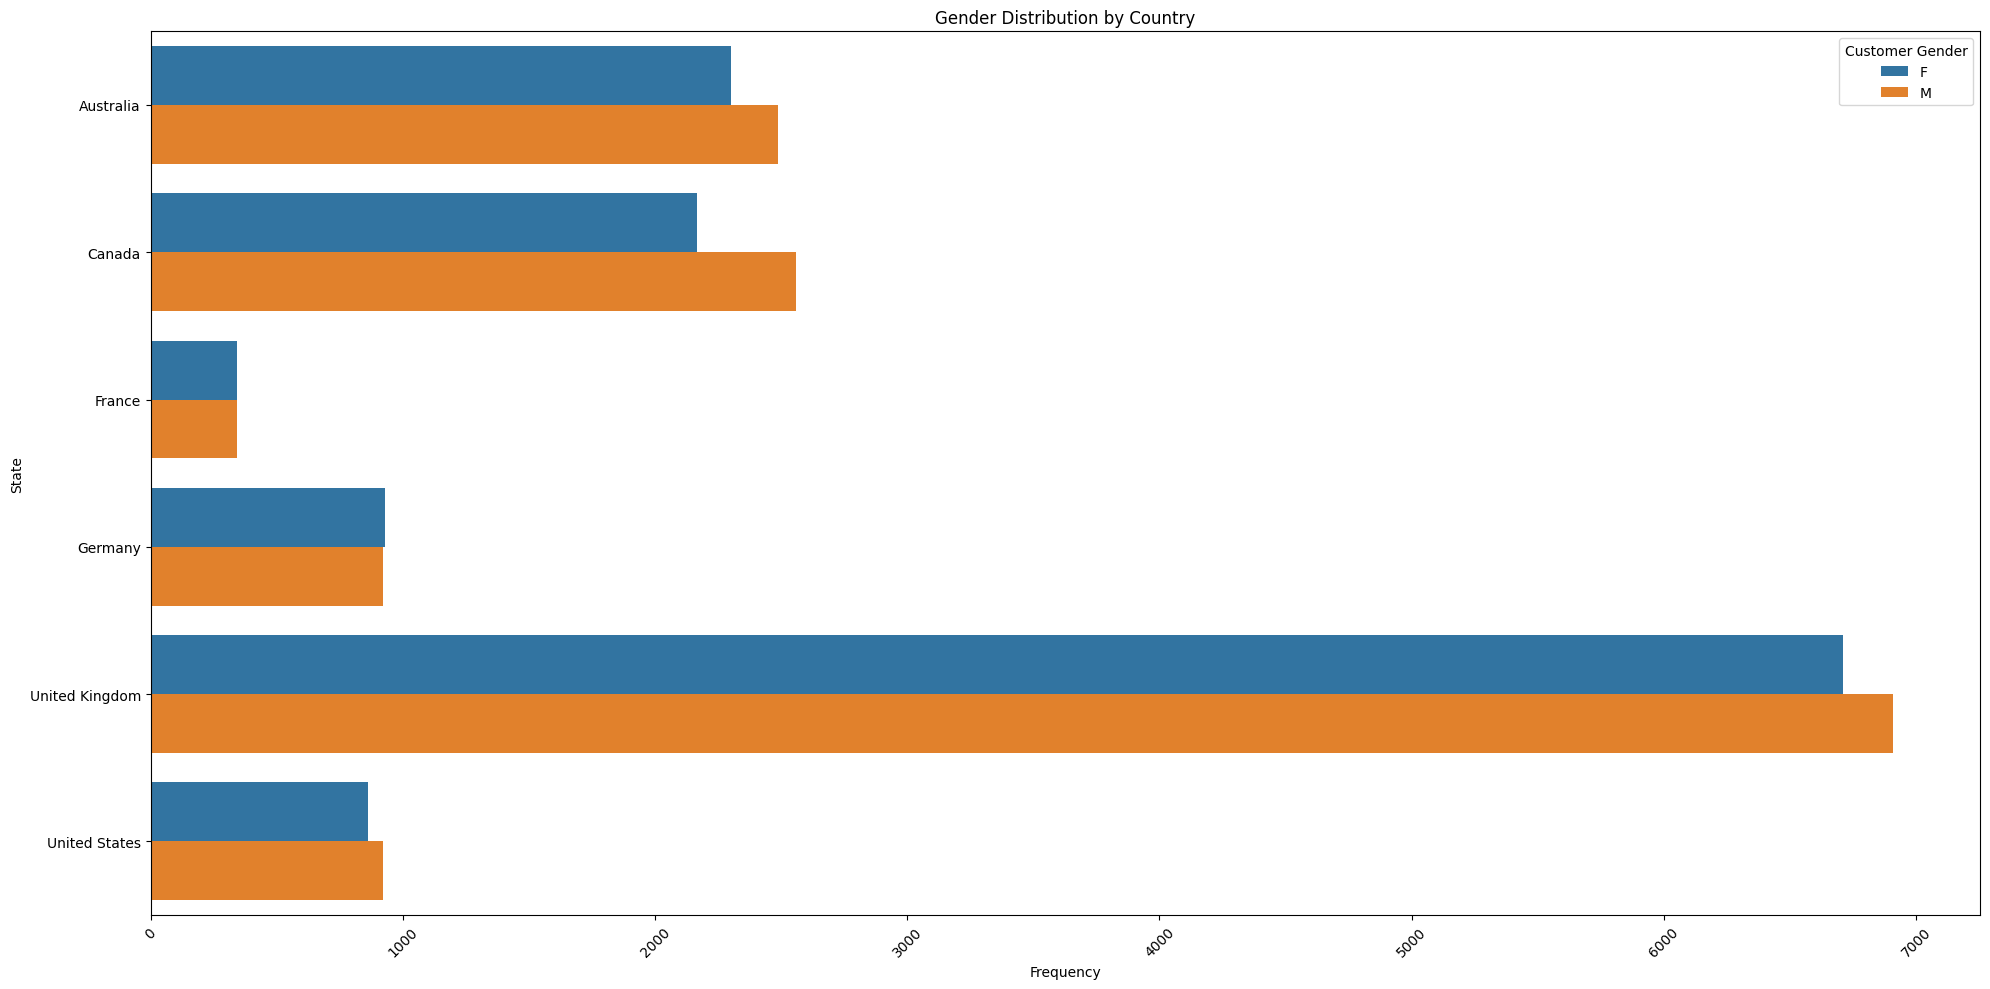

In [21]:
# Plotting
plt.figure(figsize=(20, 10))
sns.barplot(
    data=pivot_df.melt(id_vars=["Country", "State"], value_vars=["F", "M"]),
    y="Country", x="value", hue="Customer_Gender",
    ci=None, dodge=True, palette=["#1f77b4", "#ff7f0e"]
)

# Rotate country names for readability
plt.xticks(rotation=45)

plt.xlabel("Frequency")
plt.ylabel("State")
plt.title("Gender Distribution by Country")
plt.legend(title="Customer Gender")

# Show the plot
plt.tight_layout()
plt.show()

##3. What is the most popular Product_Category and Sub_Category in terms of Order_Quantity?

In [22]:
list(df.columns)

['Date',
 'Day',
 'Month',
 'Year',
 'Customer_Age',
 'Age_Group',
 'Customer_Gender',
 'Country',
 'State',
 'Product_Category',
 'Sub_Category',
 'Product',
 'Order_Quantity',
 'Unit_Cost',
 'Unit_Price',
 'Profit',
 'Cost',
 'Revenue']

In [23]:
ProdCatSubOrd=df[['Product_Category','Sub_Category','Order_Quantity']]
ProdCatSubOrd

,Product_Category,Sub_Category,Order_Quantity
0,Accessories,Bike Racks,8
1,Accessories,Bike Racks,8
2,Accessories,Bike Racks,23
3,Accessories,Bike Racks,20
4,Accessories,Bike Racks,4
...,...,...,...
113031,Clothing,Vests,3
113032,Clothing,Vests,22
113033,Clothing,Vests,22
113034,Clothing,Vests,24


In [24]:
ProdCatSubOrd[['Product_Category',"Order_Quantity"]].groupby('Product_Category').sum()

,Order_Quantity
Product_Category,
Accessories,1054162
Bikes,36411
Clothing,254743


So, the most popular Product_Category in terms of Order_Quantity is **"Accessories"**.

In [25]:
OrdQunt_ProdCat_SubCat=ProdCatSubOrd.groupby(['Product_Category','Sub_Category']).sum()
OrdQunt_ProdCat_SubCat

Order_Quantity
Product_Category Sub_Category                     
Accessories      Bike Racks                   4741
                 Bike Stands                  2412
                 Bottles and Cages          241726
                 Cleaners                    27574
                 Fenders                     62138
                 Helmets                    181606
                 Hydration Packs             19914
                 Tires and Tubes            514051
Bikes            Mountain Bikes              11992
                 Road Bikes                  19771
                 Touring Bikes                4648
Clothing         Caps                        67268
                 Gloves                      39978
                 Jerseys                     88125
                 Shorts                      27168
                 Socks                       17678
                 Vests                       14526

In [26]:
OrdQunt_ProdCat_SubCat.idxmax()

,0
Order_Quantity,"(Accessories, Tires and Tubes)"


So, the most popular Sub_Product_Category in terms of Order_Quantity is **"Tires and Tubes"** lies under the Product_Category "Accessories".

#Clustering for Segmentation:

In [27]:
list(df.columns)

['Date',
 'Day',
 'Month',
 'Year',
 'Customer_Age',
 'Age_Group',
 'Customer_Gender',
 'Country',
 'State',
 'Product_Category',
 'Sub_Category',
 'Product',
 'Order_Quantity',
 'Unit_Cost',
 'Unit_Price',
 'Profit',
 'Cost',
 'Revenue']

### 1. **Order Quantity**:
The order quantity refers to the total number of units purchased or ordered. It is an important metric to determine the total amount of products or services to be provided or sold.

$
\text{Order Quantity} = \text{Total Units Ordered}
$

### 2. **Unit Cost**:
The unit cost is the cost incurred to produce, purchase, or acquire one unit of a product. It is calculated by dividing the total cost by the number of units produced or purchased.

$
\text{Unit Cost} = \frac{\text{Total Cost}}{\text{Number of Units}}
$

### 3. **Unit Price**:
The unit price is the selling price for one unit of a product. It is typically set higher than the unit cost to ensure profitability.

$
\text{Unit Price} = \frac{\text{Total Revenue}}{\text{Number of Units Sold}}
$

### 4. **Profit**:
Profit refers to the difference between the revenue earned from sales and the cost of producing or acquiring the goods sold. It can be calculated as:

$
\text{Profit} = \text{Revenue} - \text{Cost}
$

### 5. **Cost**:
Cost refers to the total amount spent on producing or purchasing the goods or services. It includes fixed and variable costs such as labor, materials, and overhead.

$
\text{Cost} = \text{Unit Cost} \times \text{Order Quantity}
$

### 6. **Revenue**:
Revenue refers to the total income generated from the sale of products or services. It is calculated by multiplying the unit price by the number of units sold.

$
\text{Revenue} = \text{Unit Price} \times \text{Quantity Sold}
$


##4. Can we segment customers based on their purchasing behavior (e.g.,Order_Quantity, Profit, Revenue)? Use clustering techniques such as K-Means or Hierarchical Clustering.


In [28]:
list(df.columns)

['Date',
 'Day',
 'Month',
 'Year',
 'Customer_Age',
 'Age_Group',
 'Customer_Gender',
 'Country',
 'State',
 'Product_Category',
 'Sub_Category',
 'Product',
 'Order_Quantity',
 'Unit_Cost',
 'Unit_Price',
 'Profit',
 'Cost',
 'Revenue']

In [29]:
OPR=df[['Order_Quantity','Profit','Revenue']]

###By matplotlib



```
x1=OPR['Order_Quantity']
x2=OPR["Profit"]
x3=OPR["Revenue"]

# Store data in a list for looping
data = [x1, x2, x3]
labels = ['Order_Quantity', "Profit", "Revenue"]

# Create a figure
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# Loop through all combinations of i and j
for i in range(3):
    for j in range(3):
        ax = axes[i, j]  # Access the subplot
        ax.scatter(data[i], data[j], alpha=0.6)
        ax.set_xlabel(labels[i])
        ax.set_ylabel(labels[j])
        ax.set_title(f"{labels[i]} vs {labels[j]}")
        
# Adjust layout for better readability
plt.tight_layout()
plt.show()

```



###By seaborn

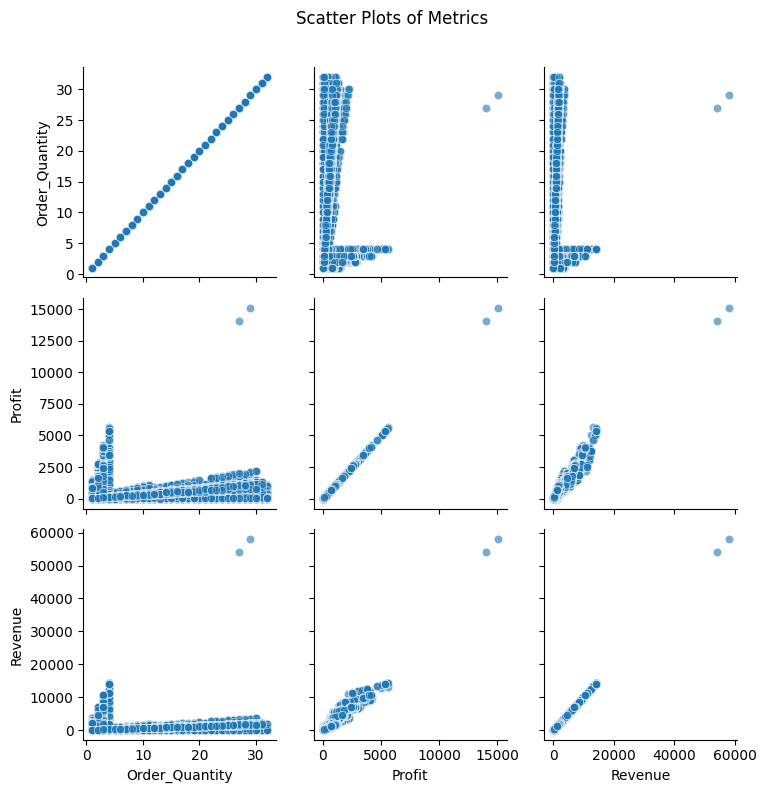

In [30]:
# Create a PairGrid
g = sns.PairGrid(OPR)

# Map scatter plots to the grid
g.map(sns.scatterplot, alpha=0.6)

# Add titles and adjust layout
g.fig.suptitle("Scatter Plots of Metrics", y=1.05)
plt.show()

###Remove outliers

In [31]:
x = pd.DataFrame(OPR)

# Use & for combining conditions and wrap each condition in parentheses
filtered_data = x[(x['Order_Quantity'] > 25) & (x['Profit'] > 12500) & (x['Revenue'] > 50000)]

# Display the filtered result
print(filtered_data)


        Order_Quantity  Profit  Revenue
112072              27   14055    54069
112073              29   15096    58074


In [32]:
OPR=OPR.drop([112072, 112073 ])

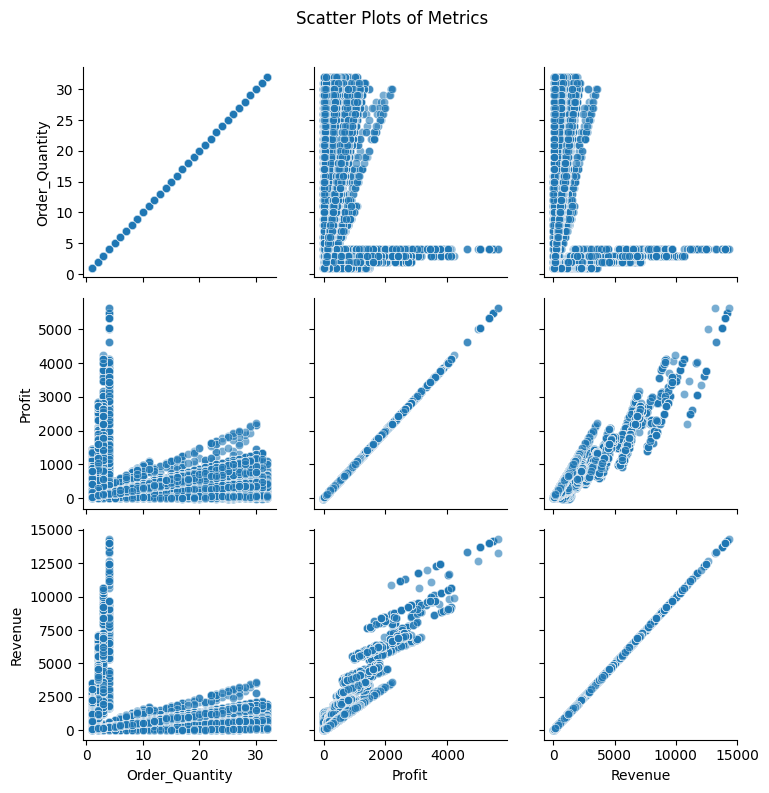

In [33]:
# Create a PairGrid
g = sns.PairGrid(OPR)

# Map scatter plots to the grid
g.map(sns.scatterplot, alpha=0.6)

# Add titles and adjust layout
g.fig.suptitle("Scatter Plots of Metrics", y=1.05)
plt.show()

###Data Normalizations

In [34]:
# Standardize the data
scaler = StandardScaler()
normalized_data_OPR = scaler.fit_transform(OPR)
normalized_data_OPR

array([[-0.40802282,  0.67839674,  0.15261936],
       [-0.40802282,  0.67839674,  0.15261936],
       [ 1.16074271,  2.40327819,  1.27897344],
       ...,
       [ 1.05615834,  0.82287778,  0.33348807],
       [ 1.26532708,  0.88733856,  0.39326013],
       [ 1.16074271,  0.82287778,  0.35211832]])

###Clustering

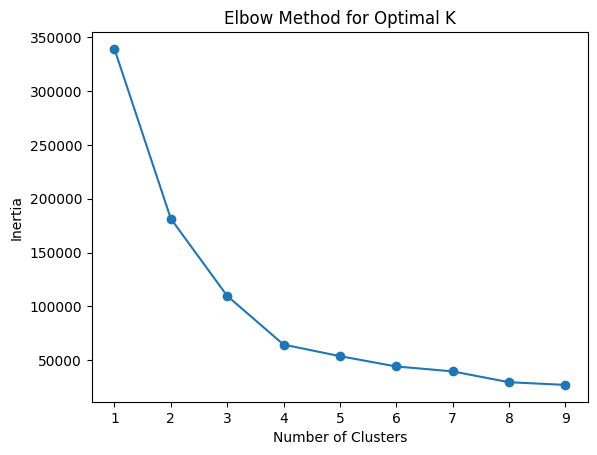

In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine optimal number of clusters using the elbow method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data_OPR)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()



####Following elbow method 2 clusters will be optimistics

In [36]:
# Fit the KMeans model with optimal K (e.g., K=3)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(normalized_data_OPR)

# Add cluster labels to the original data
OPR['Cluster'] = clusters
print(OPR)


        Order_Quantity  Profit  Revenue  Cluster
0                    8     590      950        0
1                    8     590      950        0
2                   23    1366     2401        1
3                   20    1188     2088        1
4                    4     238      418        0
...                ...     ...      ...      ...
113031               3     112      184        0
113032              22     655     1183        0
113033              22     655     1183        0
113034              24     684     1260        0
113035              23     655     1207        0

[113034 rows x 4 columns]


###Evaluate and Visualize Clusters

###Evaluate

In [37]:
from sklearn.metrics import silhouette_score

score = silhouette_score(normalized_data_OPR, clusters)
print(f"Silhouette Score: {score}")


Silhouette Score: 0.5912938135047957


A Silhouette Score of 0.591 for 2 clusters indicates that the clustering is reasonably well-separated, with a moderate degree of compactness and distinction between the clusters.

Silhouette Score: 0.5912938135047957 for  2 clustering

Silhouette Score: 0.5207214487089263 for $ clustering

###Visualize Clusters

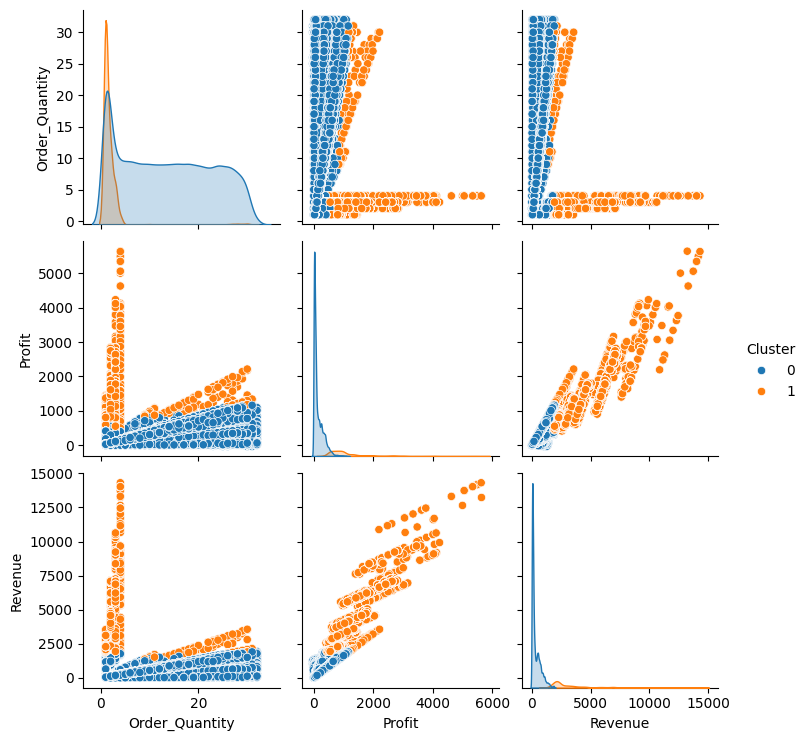

In [38]:
sns.pairplot(OPR, hue='Cluster', palette='tab10')
plt.show()




```
# Perform hierarchical clustering
linked = linkage(normalized_data_OPR, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=OPR.index, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Customer Index")
plt.ylabel("Distance")
plt.show()
```



##5. What are the characteristics of each customer cluster?

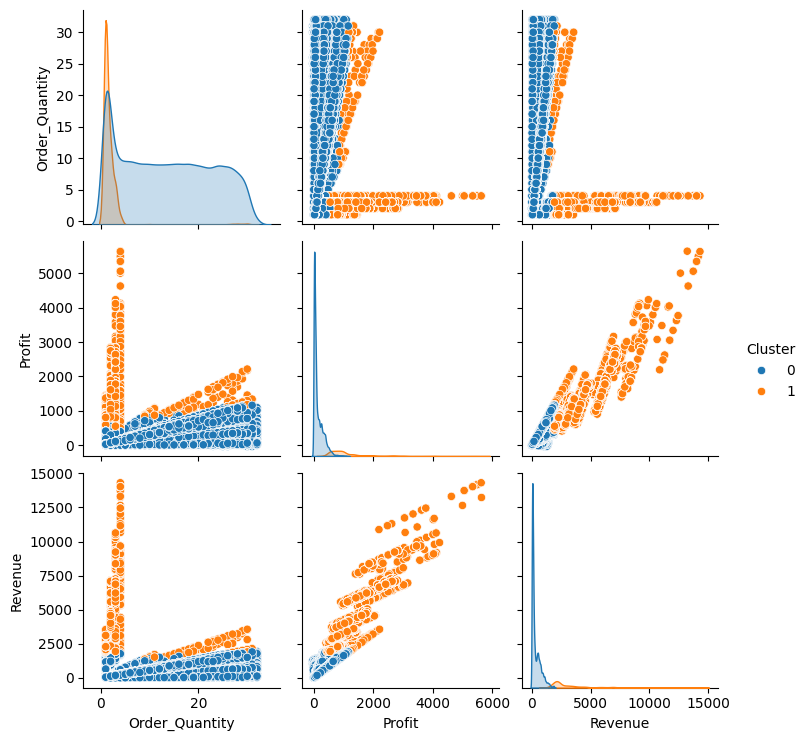

characteristics of each customer cluster

1.   Cluster 0:Low Profit and Revenue Customers

 The customer from whom company get low profit and Revenue. Both profit and revenue increase with order quantity


2.   Cluster 1:High or Moderate Profit and Revenue Customers

 The customer from whom company get high or modarate profit and revenue.Both profit and revenue are seem differen for same order quantity.This means they may order products at different unit prices .



##Profitability and Revenue Analysis:

###6. Which Product_Category or Sub_Category generates the highest Profit and Revenue?

In [40]:
list(df.columns)

['Date',
 'Day',
 'Month',
 'Year',
 'Customer_Age',
 'Age_Group',
 'Customer_Gender',
 'Country',
 'State',
 'Product_Category',
 'Sub_Category',
 'Product',
 'Order_Quantity',
 'Unit_Cost',
 'Unit_Price',
 'Profit',
 'Cost',
 'Revenue']

In [3]:
CSPR=df[['Product_Category','Sub_Category','Profit','Revenue']]

In [60]:
CSPR.groupby(['Product_Category']).sum()

,Sub_Category,Profit,Revenue
Product_Category,,,
Accessories,Bike RacksBike RacksBike RacksBike RacksBike R...,8862377,15117992
Bikes,Mountain BikesMountain BikesMountain BikesMoun...,20519276,61782134
Clothing,CapsCapsCapsCapsCapsCapsCapsCapsCapsCapsCapsCa...,2839447,8370882


In [61]:
CSPR.groupby(['Product_Category']).sum().idxmax()

,0
Sub_Category,Bikes
Profit,Bikes
Revenue,Bikes


**"Bikes"** generates the highest Profit and Revenue

In [53]:
CSPR.groupby(['Product_Category','Sub_Category']).sum().idxmax()

,0
Profit,"(Bikes, Road Bikes)"
Revenue,"(Bikes, Road Bikes)"


 So, sub-category **"Road Bikes"** under category **"Bikes"** generates the highest Profit and Revenue.

###7. Analyze the relationship between Unit_Cost, Unit_Price, and Profit.

In [62]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26/11/2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,26/11/2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,23/03/2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,23/03/2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,15/05/2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [5]:
CosPriPro=df[["Unit_Cost","Unit_Price","Profit"]]

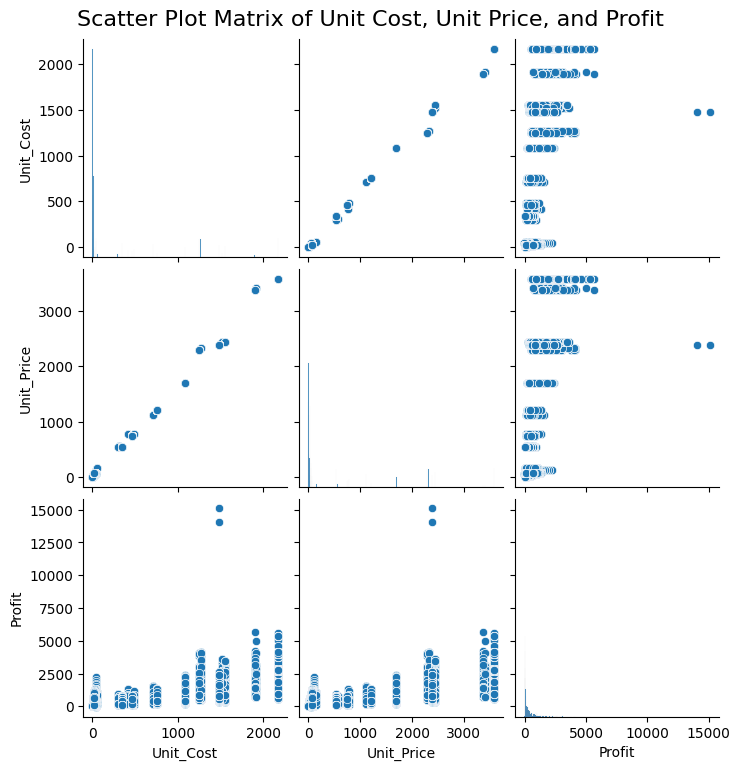

In [66]:
# Select the desired columns
CosPriPro = df[["Unit_Cost", "Unit_Price", "Profit"]]

# Create the pairplot
g = sns.pairplot(CosPriPro)

# Add a title to the entire figure
plt.suptitle("Scatter Plot Matrix of Unit Cost, Unit Price, and Profit",
             fontsize=16, y=1.02)  # Adjust 'y' to move the title higher if needed

# Display the plot
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Prepare the features (Unit_Cost, Unit_Price) and target (Profit)
CosPriPro = df[["Unit_Cost", "Unit_Price", "Profit"]]
X = CosPriPro[["Unit_Cost", "Unit_Price"]]  # Features
y = CosPriPro["Profit"]  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate RMSE and MAE
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred))

# Display the coefficients and evaluation metrics
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# If you want to show R-squared as a percentage:
r2_percentage = r2 * 100
print(f"implies, R-squared: {r2_percentage:.2f}%")


Coefficients: [-1.40980666  1.20902136]
Intercept: 114.32193920157181
Mean Squared Error: 91672.97301527699
Root Mean Squared Error: 302.7754498225987
Mean Absolute Error: 171.5000660020636
R-squared: 0.5630057529211256
implies, R-squared: 56.30%


$\text{Profit} = -1.40980666 \times \text{Unit\_Cost} + 1.20902136 \times \text{Unit\_Price} + 114.3219$
